# Introduction

Like Perceptron Learning Algorithm (PLA), Support Vector Machine (SVM) only works when the data of 2 classes is linearly separable. Naturally, we also want SVM to be able to work with data that is nearly linearly separable like Logistic Regression does.

It is recommended that you read Support Vector Machine before reading this notebook.

Consider the 2 examples in Figure below:

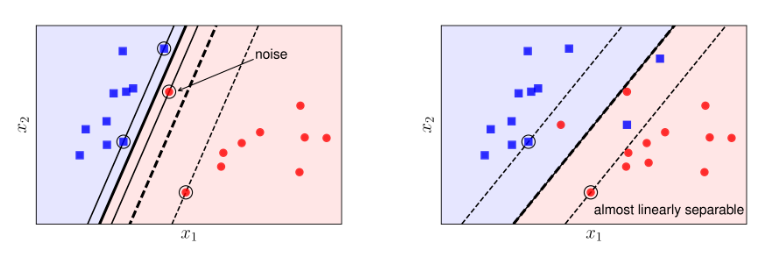

There is 2 cases:
- Case 1 (left): The data is linearly separable. In this case, SVM can find the optimal hyperplane that separates the 2 classes. But if we use pure SVM, we will get a very small margin. In addition, the classification line is too close to the blue square class and too far from the red circle class. Meanwhile, if we sacrifice this noise point, we get a much better margin depicted by the dashed lines. Pure SVM is therefore also considered sensitive to noise.
- Case 2 (right): In this case, if we use pure SVM, it is clear that the optimization problem is infeasible, that is, the feasible set is an empty set, so the SVM optimization problem becomes unsolvable. However, if we sacrifice a little bit of the points near the boundary between the two classes, we can still create a pretty good separation line as shown in the bold dashed line.

So in both cases, margin created by a dashes line called **soft margin** while the thin line is **hard margin**.

Soft Margin SVM have 2 way to engage with, both return good results and can be used to develop a complex SVM version.

- ***First way***: We solve it like a optimization problem with constrants like previous one. This method is a basis for Kernel SVM with data that is not linearly separable.

- ***Second way***: Turn it into a unconstrained optimization problem. Can be solve by using Gradient Descent, can be applied into large dataset. Also we will see new loss function called Hinge Loss. (Already introduced in 0.5 Loss folder notebook)